In [1]:
#pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install


In [203]:
# install
#!pip install pretty-jupyter


In [204]:
# export
#jupyter nbconvert --to html --template pj /path/to/ipynb/file

In [205]:
#bez instalowania paczek do ladnych raportow
#[Link Text](#Target-Header) # musza byc myslniki zamiast spacji

## opis kolumn

    Booking_ID: unique identifier of each booking
    no_of_adults: Number of adults
    no_of_children: Number of Children
    no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
    no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
    type_of_meal_plan: Type of meal plan booked by the customer:
    required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
    room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
    lead_time: Number of days between the date of book
    arrival_date: Date of the monthing and the arrival date
    arrival_year: Year of arrival date
    arrival_month: Month of arrival date
    market_segment_type: Market segment designation.
    repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
    no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
    no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
    avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
    no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
    booking_status: Flag indicating if the booking was canceled or not.


# Table of Contents

1. [Wczytanie bibliotek](#Wczytanie-bibliotek)
2. [EDA and Data Cleaning](#EDA-and-Data-Cleaning)

# Wczytanie bibliotek

In [744]:
#%reset #służy do czyszczenia interaktywnej przestrzeni nazw, ale umożliwia również czyszczenie pamięci podręcznej wejścia i wyjścia
#import pprint
#a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import time

# do pomiaru czasu uczenia modeli
# %time podaje czas
# %timeit mierzy kilka razy i podaje uśrednioną wartość (dokładniejszą) - samo dostosowuje liczbe ile razy mierzy
#jesli daje jeden procent '%' to mierzy tylko daną linie, jesli dwa procenty to ustawiam na początku komórki
#ten procent w lniijce dziala tylko w notebookach
#poza trzebaby uzyc:import timeit
# def load_csv():
#     df = pd.read_csv("Hotel Reservations.csv")

# timeit.timeit(load_csv, number=100)

%matplotlib inline

# EDA and Data Cleaning

In [745]:
%time df = pd.read_csv("Hotel Reservations.csv")
# #CPU times shows the time you used your CPU.
# Wall time shows the real time elapsed since the beginning of the cell. This is the time you are interested in.
df2= df.copy() #dane do wizualizacji


CPU times: total: 62.5 ms
Wall time: 65.8 ms


In [746]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [747]:
#wyrzucam kolumne Booking_ID bo to zbędny indeks

#do operacji usunięcia kolumny stosujemy metode 'drop' z parametrem axis=1 , do wierszy axis=0
df = df.drop('Booking_ID', axis=1)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [748]:
df.shape

(36275, 18)

In [749]:
#mamy 36 tysiecy wierszy i 19 kolumn

### zamiana zmiennych kategorycznych w postaci tekstu na liczby

In [750]:
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

# ładniejsze

In [751]:
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
arrival_year,2


In [752]:
#nazwy kolumn
list(df)

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

In [753]:
# df.info() pokazuje wiecej niz 
# df.dtypes
df.info()
#sprawdzam typy danych czy sa rozne ilosci niepustych wartosci w kolumnach
# juz widac ze nie ma pustych wartosci w zbiorze
# gdyby byly puste wartosci mozna je w najprostszy sposob zastapiac srednia, mediana,
# lub zastosowac
# data = data.fillna(method='ffill') 
# which fills the last observed non-null value forward until another non-null value is encountered.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [754]:
# Sa tu dane kategoryczne w postaci liczb calkowitych, object ktore sa tak naprawde string (bo wczytujemy z csv) oraz dane zmiennoprzecinkowe liczbowe ciągłe

Od razu widać też, że nie mamy pustych wartości, ale sprawdzę to jeszcze funkcją isna.

In [755]:
#liczba pustych wartosci w kolumnach
# isnull is an alias for isna
#df.isnull().sum()
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Nie ma pustych komórek więc nie trzeba ich usuwać lub uzupełniać.

In [756]:
condition = (df['avg_price_per_room'] == 0)

count_zero_values = condition.sum()

print(f'Liczba wierszy z wartością 0 w kolumnie avg_price_per_room: {count_zero_values}')

Liczba wierszy z wartością 0 w kolumnie avg_price_per_room: 545


niby brak NA ale zamiast tego mogą być bezsensowne zera jak np w kolumnie avg_price_per_room, usuwam je

In [757]:
df = df[~condition]

Podzielmy kolumny na binarne, kategoryczne i numeryczne (ciągłe)

In [758]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['required_car_parking_space',
 'arrival_year',
 'repeated_guest',
 'booking_status']

### zamiana zmiennych kategorycznych w postaci tekstu na liczby

In [759]:
# Sprawdźmy kolumny w których nie mamy danych liczbowych
non_float_columns = df.select_dtypes(exclude=['float', 'int']).columns

print("Kolumny z typami danych innymi niż liczbowe:")
print(non_float_columns)

Kolumny z typami danych innymi niż liczbowe:
Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')


In [760]:
df[non_float_columns].head()

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled


In [761]:
#sprawdzam jakie wartości mają kolumny z tekstem
#gdyby był błąd w ramce typu, że Room_Type 4 by był zapisany jeszcze jako Room Type 4 gdzieś to można użyc funkcji where aby zastapic poprawna wartoscia
# df['room_type_reserved'] = np.where(df['room_type_reserved']=='Room Type 4', 'Room_Type 4', df['room_type_reserved'])

unique1=df['type_of_meal_plan'].unique().tolist()
unique2=df['room_type_reserved'].unique().tolist()
unique3=df['market_segment_type'].unique().tolist()
#oraz zmienna ktora bedziemy przewidywac
unique4=df['booking_status'].unique().tolist()
print(unique1)
print(unique2)
print(unique3)
print(unique4)

['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']
['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5', 'Room_Type 7', 'Room_Type 3']
['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']
['Not_Canceled', 'Canceled']


Ponieważ większość algorytmów uczenia maszynowego woli zmienne liczbowe od tekstowych dokonam zamiany z tekstu na liczby.

In [762]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [763]:
# I SPOSOB
#za pomoca sklearn tworzy poprostu liczby zamiast kategorii

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['type_of_meal_plan'] = le.fit_transform(df.type_of_meal_plan)
# print(df['type_of_meal_plan'].value_counts())
# print(df['type_of_meal_plan'].sample(5))

#ale tutaj zastosuje one hot encoding bo nie widze hierarchii



#sprobuje one-hot-encoding bo nie widze hierarchii

df = pd.get_dummies(data=df, columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

#wszystko sie zaczyna od 0


# II SPOSOB

# class_mapping1 = {value: index for index, value in enumerate(unique1)} #tworzenie slownika jednoliniowo
# df['type_of_meal_plan'] = df['type_of_meal_plan'].map(class_mapping1)

# class_mapping2 = {value: index for index, value in enumerate(unique2)}
# df['room_type_reserved'] = df['room_type_reserved'].map(class_mapping2)

# class_mapping3 = {value: index for index, value in enumerate(unique3)}
# df['market_segment_type'] = df['market_segment_type'].map(class_mapping3)

# III SPOSOB

# #eq do 0 - 1 tylko
#zmienna przewidywana

df['booking_status'] = df['booking_status'].eq('Not_Canceled').astype(int)

#mozna byc tez uzyc from sklearn.preprocessing import Binarizer
# lb=LabelBinarizer()
# for column in binary_variables:
#     df[column] = lb.fit_transform(df[column])
    #oczywiscie najpierw trzeba stwierdzic ktore kolumny maja tylko 2 mozliwe wartosci

#######################
#The eq() method compares each value in a DataFrame to check if it is equal to a specified value, or a value from a specified DataFrame objects, and returns a DataFrame with boolean True/False for each comparison
#not canceled stał sie '0' a canceled '1'
#######################

#przyklady inne

# IV SPOSOB

# albo replace - rowniez do wiekszej liczby kategorii, za pomocą słownika
#data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})

# V SPOSOB
#albo mapowaniem ręcznym
# class_mapping = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
# data['Class'] = data['Class'].map(class_mapping)


In [764]:
df.shape 
#zwiekszyla sie liczba kolumn o liczbe kategorii w kolumnach dodanych w get dummies

(35730, 31)

In [765]:
df.head()
#nowe kolumyn z get_dummies dodały sie na koniec

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [766]:
list(df)

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status',
 'type_of_meal_plan_Meal Plan 1',
 'type_of_meal_plan_Meal Plan 2',
 'type_of_meal_plan_Meal Plan 3',
 'type_of_meal_plan_Not Selected',
 'room_type_reserved_Room_Type 1',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 3',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Aviation',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online']

In [767]:
#mozna by stworzyc nowe kolumny z czasem

#### czy usuwac elemnty kodu ktore nic nie wnosza dla widza a sa dla mnie zeby spojrzec na dane?> nie do pliku raportu a do pliku do prezentacji tak

In [768]:
df.describe().round(2)
# funkcja pokazujaca podstawowe statystyki dla kolumn liczbowych
#trzeba spojrzec czy nie rozni sie bardzo min od np 1 kwartyla

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
count,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,...,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00,35730.00
mean,1.85,0.11,0.82,2.22,0.03,86.19,2017.82,7.41,15.61,0.02,...,0.00,0.17,0.01,0.03,0.00,0.00,0.00,0.06,0.29,0.64
std,0.52,0.40,0.87,1.41,0.17,85.97,0.38,3.06,8.75,0.15,...,0.01,0.37,0.08,0.16,0.06,0.06,0.03,0.23,0.46,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,0.00,18.00,2018.00,5.00,8.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,0.00,1.00,2.00,0.00,58.00,2018.00,8.00,16.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,2.00,0.00,2.00,3.00,0.00,128.00,2018.00,10.00,23.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
max,4.00,10.00,7.00,17.00,1.00,443.00,2018.00,12.00,31.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Wizualizacja

narysowac cos z podzialem na czas bo jego jeszcze nie wykorzystalem wgl

## Pory roku

In [769]:
#Jeśli mogę cokolwiek powiedzieć o jakims wykresie to zostawić

In [770]:
df2.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [771]:
#wyrzucam wszystkie wiersze gdzie był 29 lutego w 2018 roku (a według kalendarza nie było takiego dnia) bo nie działa funkcja to_datetime przez to
indexes = df2.loc[(df2['arrival_year'] == 2018) & (df2['arrival_month'] == 2) & (df2['arrival_date'] == 29)].index
df2.loc[indexes]
df2=df2.drop(indexes)

In [772]:
# na podstawie 3 kolumn przedstawiających rok miesiąc i dzień stworzę jedną za pomocą funkcji pandas.to_datetime This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.

In [773]:
# Stworzenie kolumny z całą datą w formacie europejskim
df2['arrival_date'] = pd.to_datetime(df2[['arrival_year', 'arrival_month', 'arrival_date']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')

In [774]:
condition1 = (df2['arrival_date'].between('2017-07-01', '2018-03-31'))
condition2 = (df2['arrival_date'].between('2018-03-01', '2019-01-31'))

# Liczba wierszy dla każdego okresu
count1 = len(df2[condition1])
count2 = len(df2[condition2])

print(f'Liczba wierszy w okresie 2017-07 do 2018-03: {count1}')
print(f'Liczba wierszy w okresie 2018-03 do 2019-01: {count2}')

Liczba wierszy w okresie 2017-07 do 2018-03: 11553
Liczba wierszy w okresie 2018-03 do 2019-01: 27043


W pierwszej połowie szeregu czasowego jest znacznie więcej obserwacji więc ciężko będzie narysować jakiś wykres zależności od czasu który np sprawdziłby czy był jakiś trend w czasie w np. ilości zabieranych dzieci bo zawsze będzie pokazywać, że w pierwszej połowie było dużo mniej a następnie widać wzrost który nie wynika z trendu a z większej ilości obserwacji.

In [775]:
condition = (df2['avg_price_per_room'] == 0)
df2 = df2[~condition]

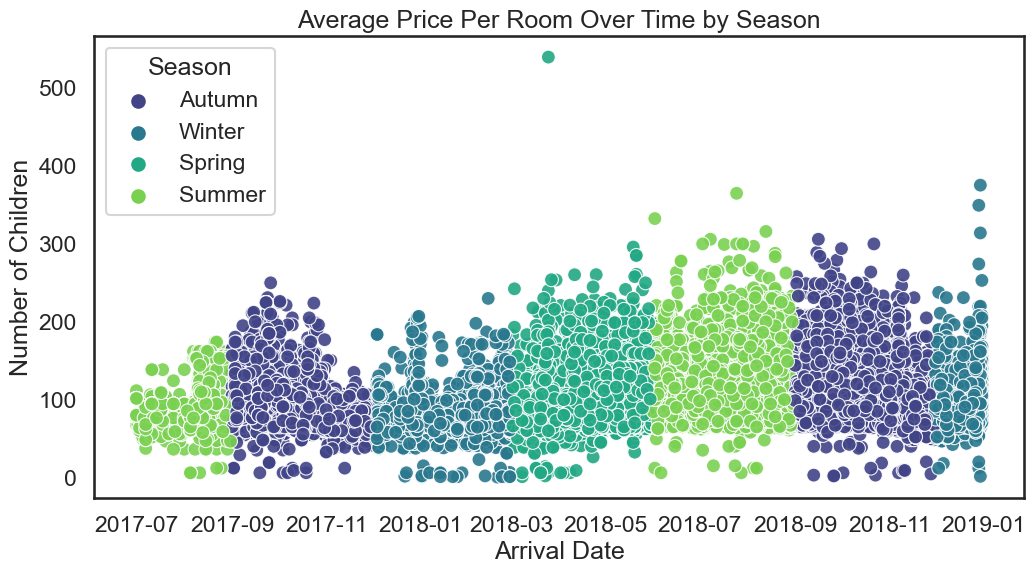

In [776]:
# Wydobycie osobnych kolumn dla roku, miesiąca i dnia
df2['year'] = df2['arrival_date'].dt.year
df2['month'] = df2['arrival_date'].dt.month
df2['day'] = df2['arrival_date'].dt.day

# Mapowanie miesięcy na pory roku
seasons_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
df2['season'] = df2['month'].map(seasons_mapping)

# Wykres punktowy liczby dzieci w zależności od daty z podziałem na pory roku
plt.figure(figsize=(12, 6))
sns.scatterplot(x='arrival_date', y='avg_price_per_room', hue='season', data=df2, palette='viridis', s=100, alpha=0.9)
plt.title('Average Price Per Room Over Time by Season')
plt.xlabel('Arrival Date')
plt.ylabel('Number of Children')
plt.legend(title='Season')
plt.show()

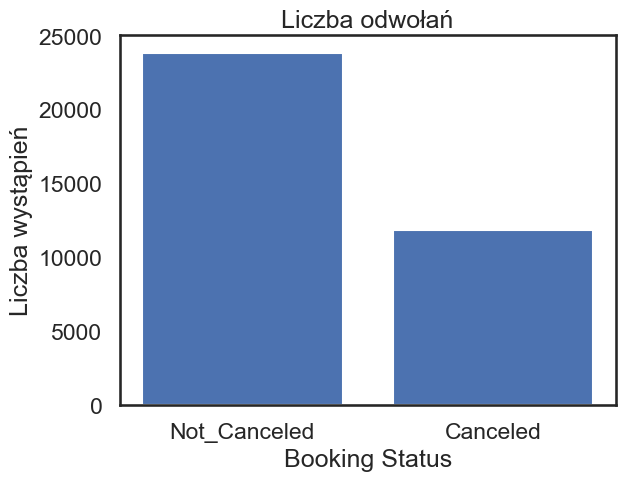

In [777]:
plt.bar(df2['booking_status'].value_counts().index, df2['booking_status'].value_counts())
plt.xlabel('Booking Status')
plt.ylabel('Liczba wystąpień')
plt.title('Liczba odwołań')

plt.show()

Liczba odwołan jest 2 razy mniejsza od rezerwacji gdzie nie było odwołań.

In [778]:
filtered_df = df2[df2['room_type_reserved'] != 'Room_Type 1']
filtered_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,year,month,day,season
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,...,0,0,0,105.61,1,Not_Canceled,2018,12,26,Winter
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,...,0,0,0,133.44,3,Not_Canceled,2018,10,18,Autumn
11,INN00012,1,0,2,1,Meal Plan 1,0,Room_Type 4,35,2018,...,0,0,0,140.40,1,Not_Canceled,2018,4,30,Spring
27,INN00028,1,0,0,2,Meal Plan 1,0,Room_Type 4,2,2018,...,0,0,0,110.00,0,Canceled,2018,5,19,Spring
30,INN00031,2,0,1,1,Meal Plan 1,0,Room_Type 4,3,2017,...,0,0,0,177.50,1,Not_Canceled,2017,9,19,Autumn


In [779]:
#kilka wykresow naraz za pomoca subplot

In [780]:
df2['room_type_reserved'].value_counts()

Room_Type 1    27717
Room_Type 4     5992
Room_Type 6      948
Room_Type 2      667
Room_Type 5      246
Room_Type 7      118
Room_Type 3        5
Name: room_type_reserved, dtype: int64

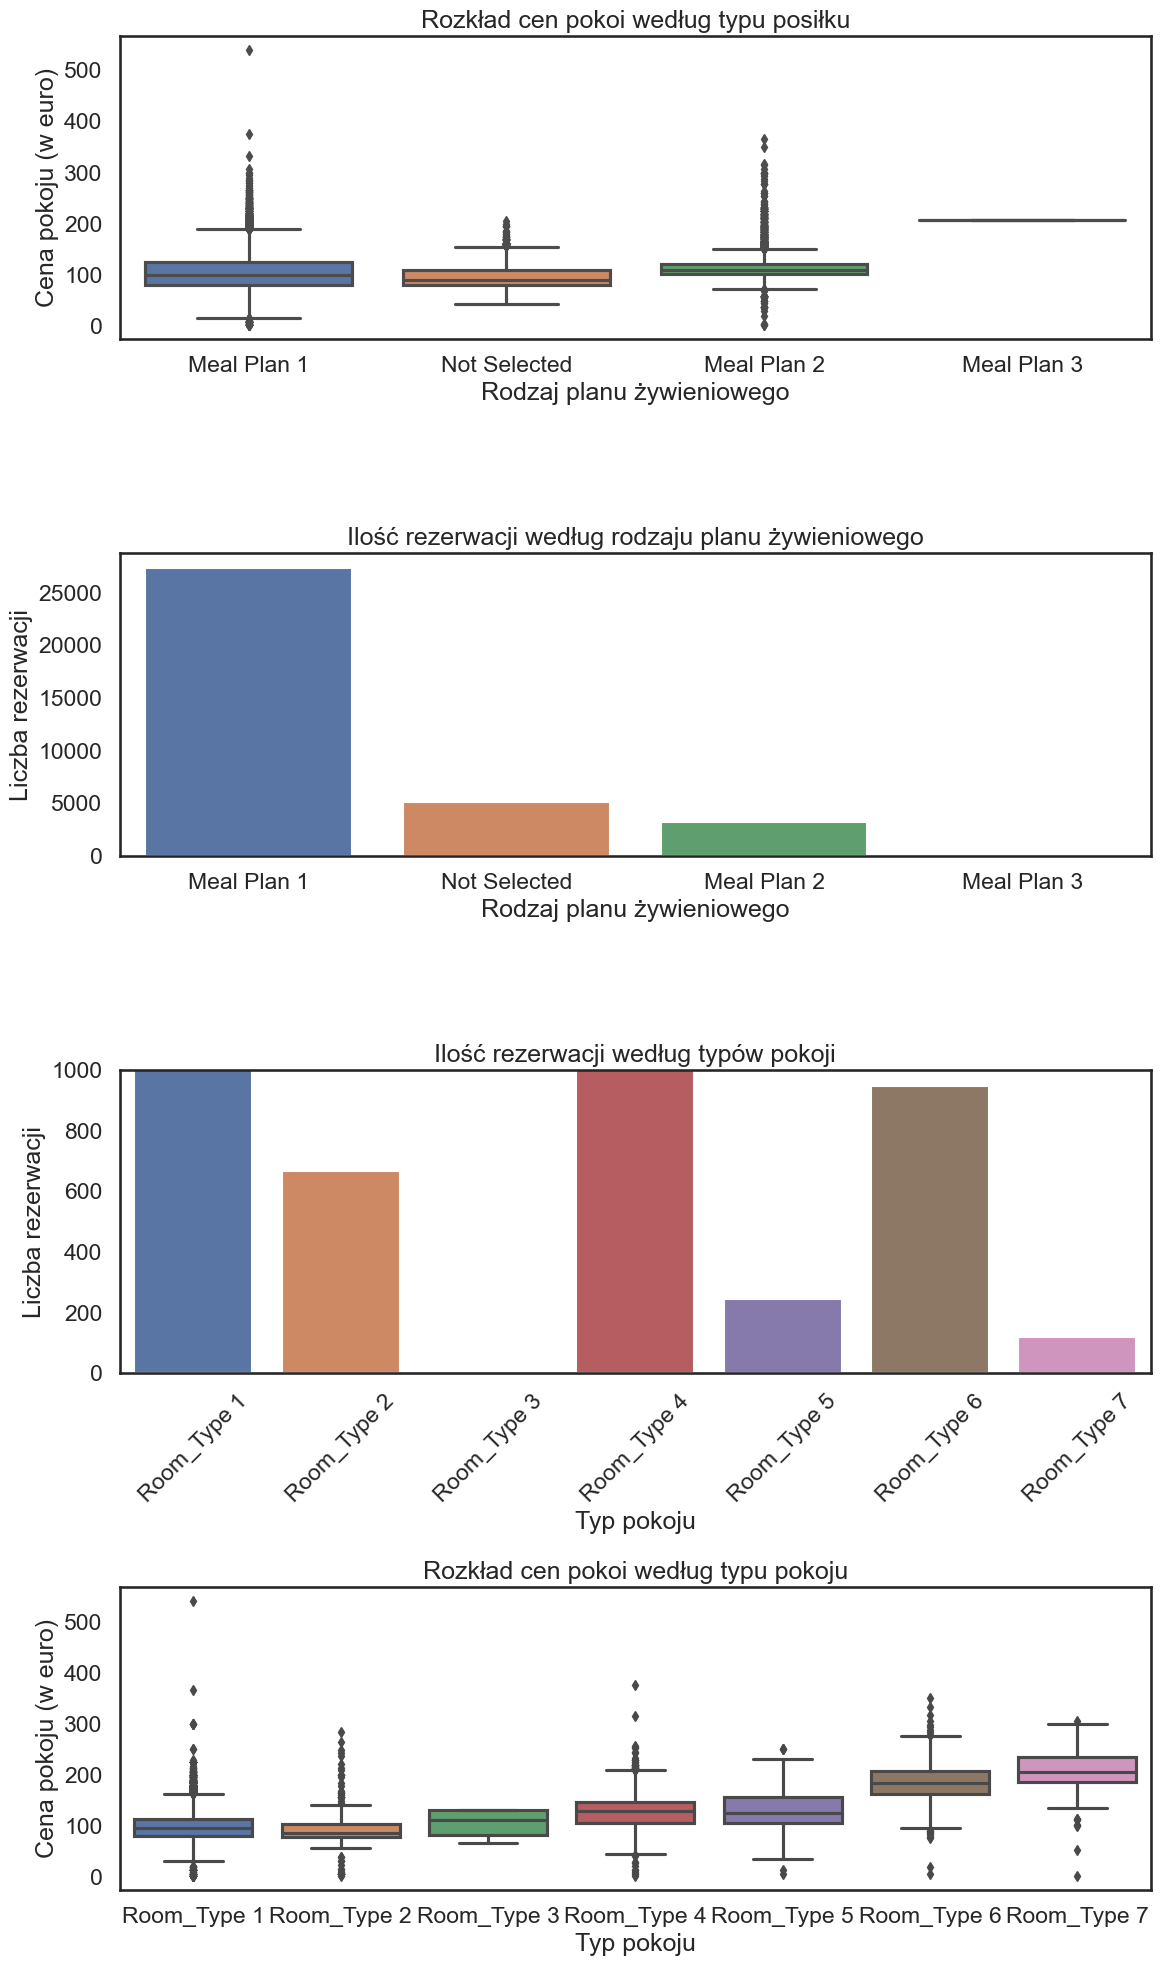

In [781]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 20))


#dla podwykresow musimy ustawic `set_title/set_xlabel/set_ylabel` a nie title/xlabel/ylabel bo one sa do calego rysunku
sns.boxplot(data=df2, x='type_of_meal_plan', y='avg_price_per_room',ax=axes[0])
axes[0].set_title('Rozkład cen pokoi według typu posiłku')
axes[0].set_xlabel('Rodzaj planu żywieniowego')
axes[0].set_ylabel('Cena pokoju (w euro)')

sns.countplot(data=df2, x='type_of_meal_plan', ax=axes[1])
axes[1].set_title('Ilość rezerwacji według rodzaju planu żywieniowego')
axes[1].set_xlabel('Rodzaj planu żywieniowego')
axes[1].set_ylabel('Liczba rezerwacji')


#trzeba pamiec zeby wpisac wszystie rodzaje zmiennych chyba ze chcemy wykluczyc z wykresu jakas, bo pominalem Room_type 7 i zmienila sie skala
room_type_order = ['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7']

#
#df_bez_Room_1 = df2[df2['room_type_reserved'] != 'Room_Type 1']
#zamiast wyrzucac Room1 ktore zaburza zakres osi y, zmienie zakres
sns.countplot(data=df2, x='room_type_reserved', ax=axes[2], order=room_type_order)
axes[2].set_title('Ilość rezerwacji według typów pokoji')
axes[2].set_xlabel('Typ pokoju')
axes[2].set_ylabel('Liczba rezerwacji')
axes[2].set_ylim(top=1000)  # adjust the top leaving bottom unchanged


sns.boxplot(data=df2, x='room_type_reserved', y='avg_price_per_room', ax=axes[3], order=room_type_order)
axes[3].set_title('Rozkład cen pokoi według typu pokoju')
axes[3].set_xlabel('Typ pokoju')
axes[3].set_ylabel('Cena pokoju (w euro)')
#Obrocenie podpisow osi x
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()
#posortowac

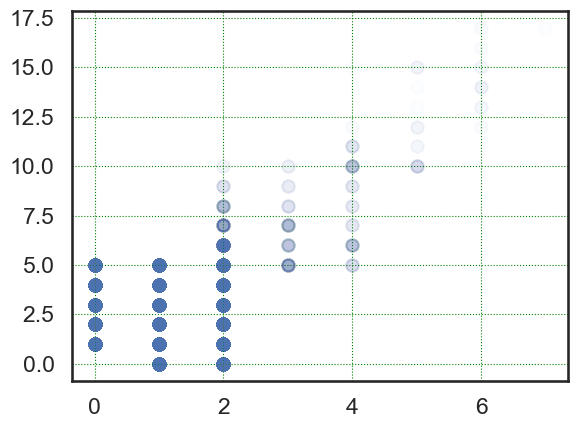

In [782]:
plt.scatter(df.no_of_weekend_nights, df.no_of_week_nights, alpha=0.01)
plt.grid(color='green', linestyle='dotted', linewidth=0.8)
#sprobowac pokolorowac na kolor czy odwolane czy nie
#sprawdzmy czy danea sa prawidlowe np czy liczba zarezerowania dni w weekend jest skorelowana z liczba
#dni na tygodniu czyli np cyz ktos zostal na pelne 2 tyg

Liczba dni rezerwacji na tygodniu i na weekend są liniowo skorelowane. Dodatkowo widać, że najwięcej osób rezerwuje 5 dni roboczych lub 2 dni weekendowe lub to i to

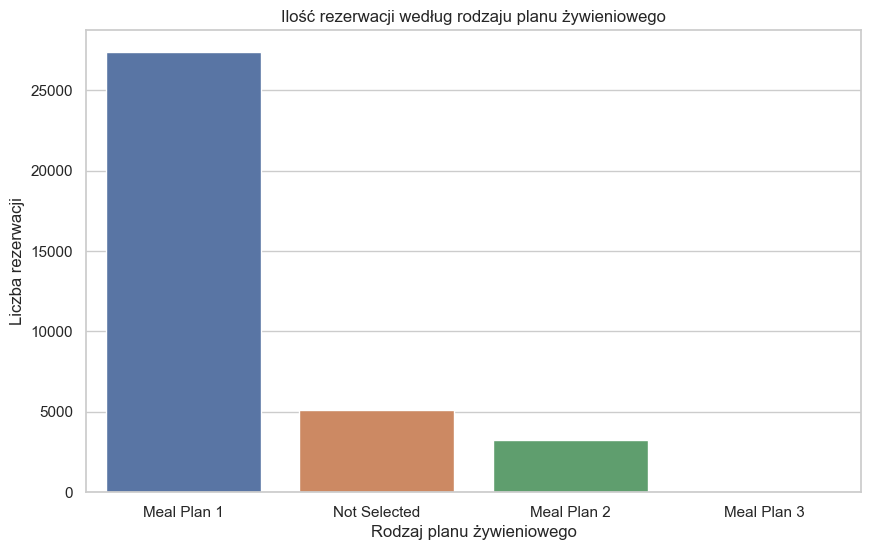

In [783]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='type_of_meal_plan')
plt.title('Ilość rezerwacji według rodzaju planu żywieniowego')
plt.xlabel('Rodzaj planu żywieniowego')
plt.ylabel('Liczba rezerwacji')
plt.show()

Jest tylko 5 rezerwacji z wybranym 'Meal Plan 3'.

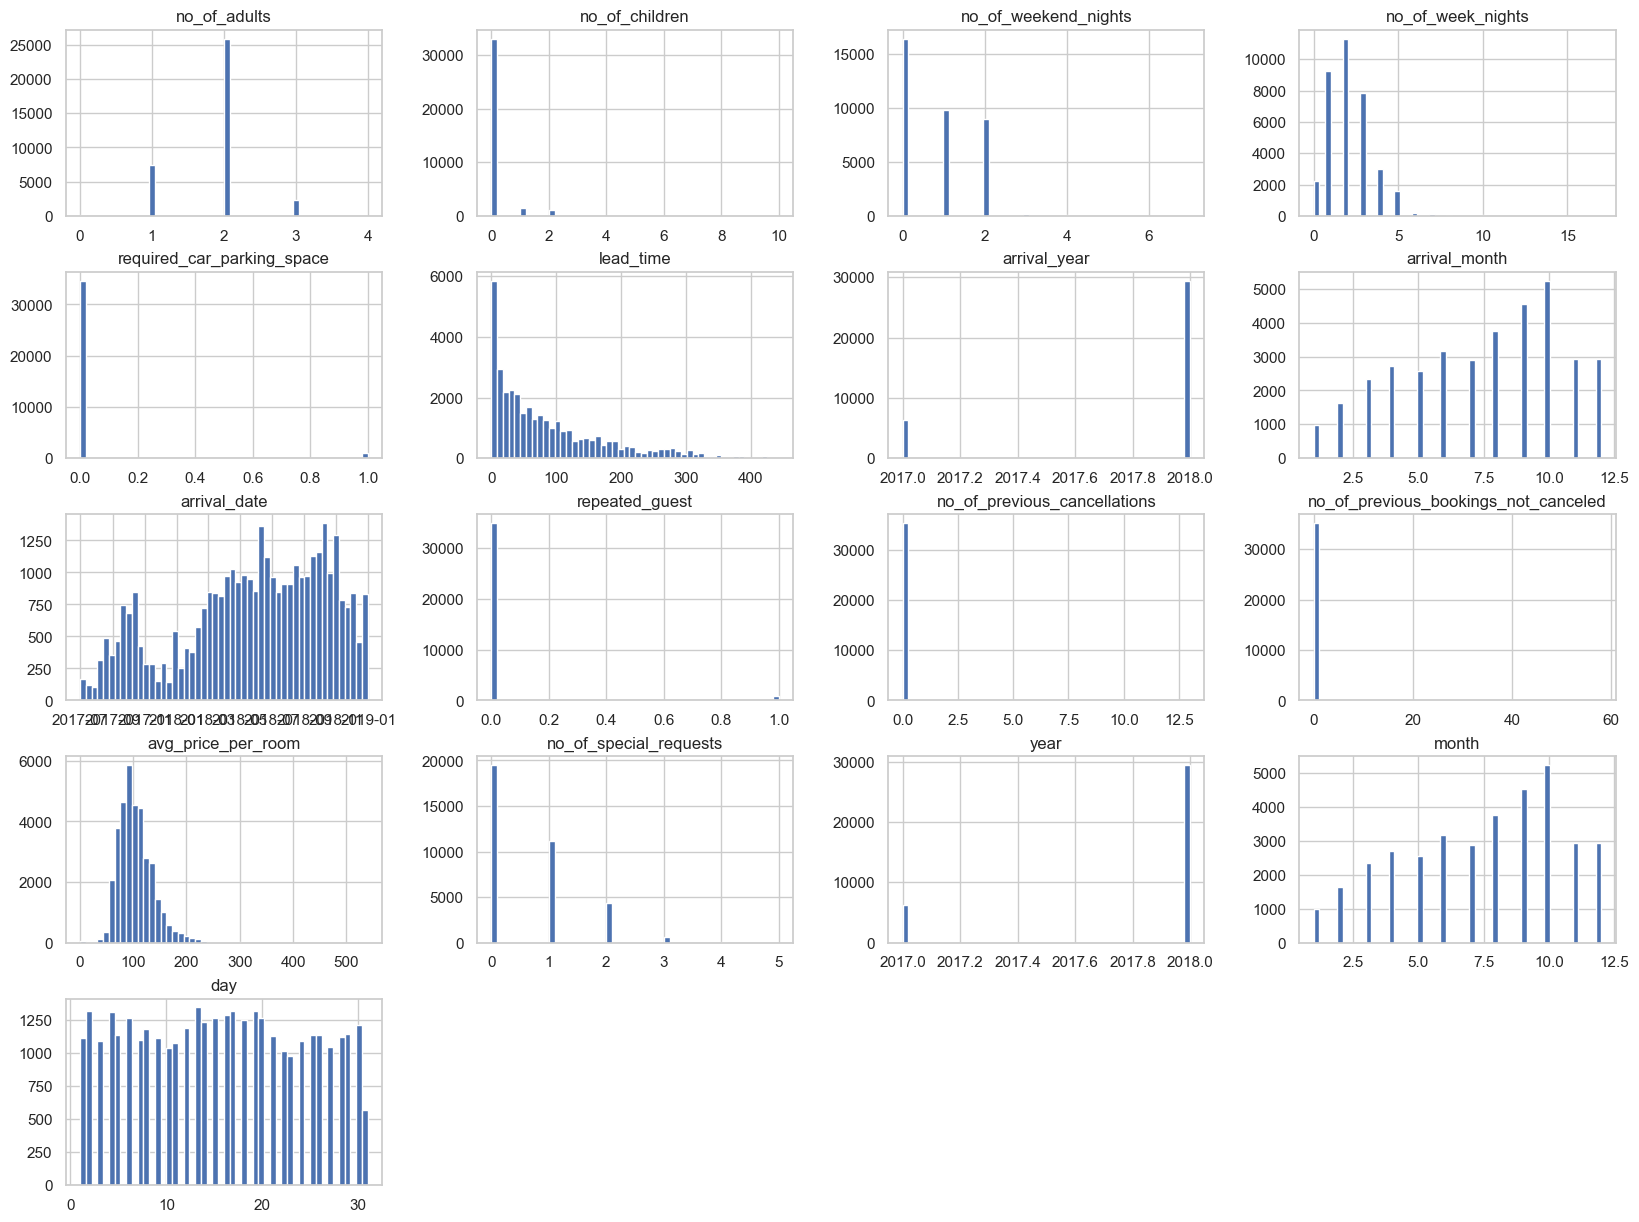

In [784]:
df2.hist(bins=50, figsize=(20,15))

plt.show()

Na histogramach rozkładu obserwacji w każdej kolumnie widać na przykład, że w kolumnie liczba dorosłych każda obserwacja poza wartością równą 2 będzie brana pod uwagę jak odstająca pod warunkiem odstawania w rozumieniu "boxplota" albo wystające poza średnia +2* odchylenie standardowe dlatego póżniej zrezygnowałem z usuwania jakichkolwiek obserwacji odstających. W kolumnie liczba dni w weekend jest gwałtowny spadek między 2 a 3 dni ponieważ mało kto rezerwował na więcej niż 1 tydzień i 5 dni.

### Korelacja

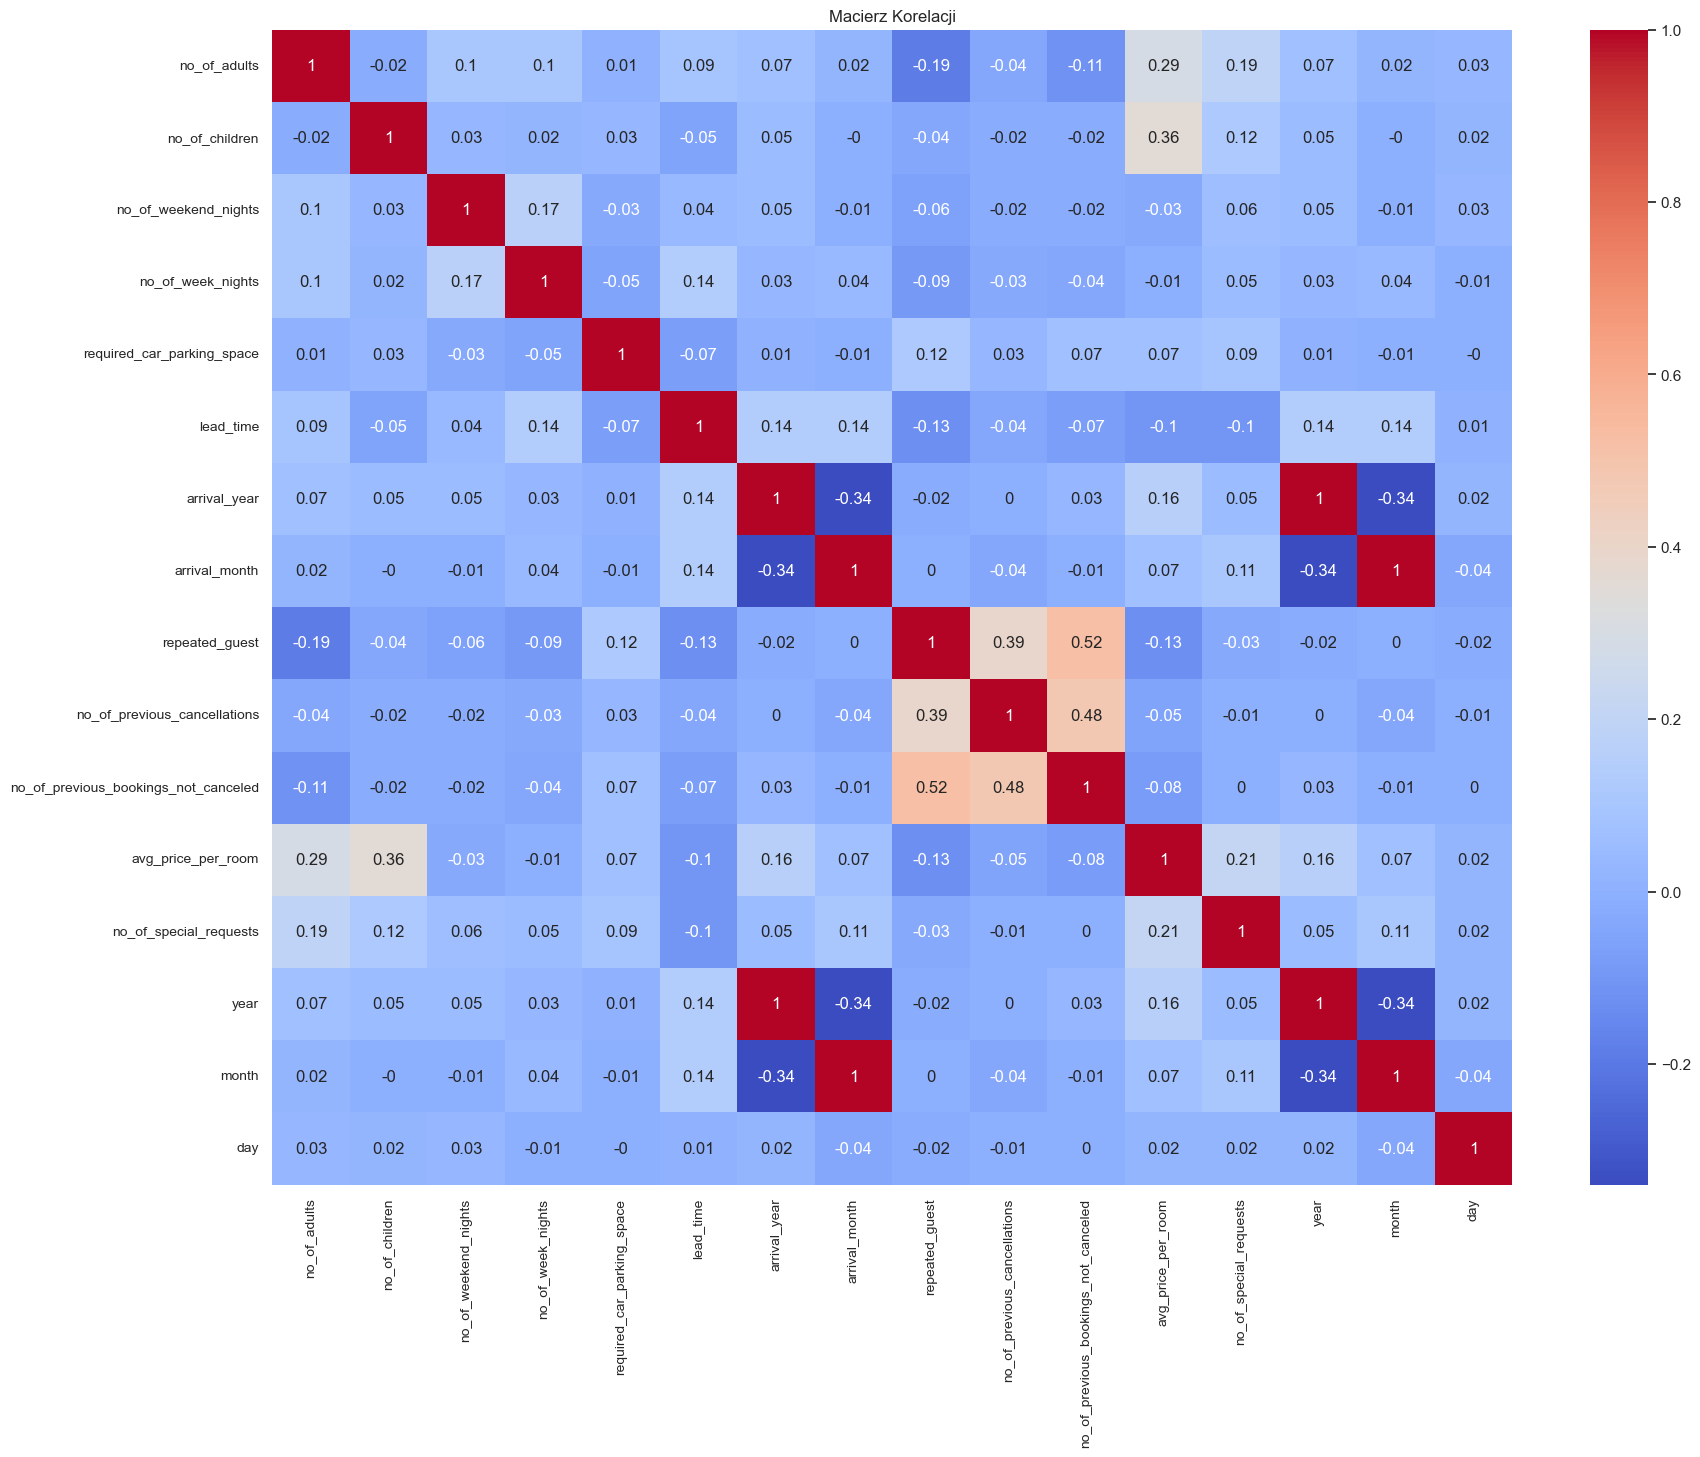

In [785]:
correlation_matrix = df2.corr().round(2)

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Macierz Korelacji")

plt.show()

#### Histogram korelacji

In [786]:
corr_values = df2.corr()
corr_values



,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,year,month,day
no_of_adults,1.000000,-0.021662,0.098545,0.100448,0.009975,0.089903,0.067471,0.023275,-0.189497,-0.044061,-0.114878,0.285331,0.190593,0.067471,0.023275,0.028009
no_of_children,-0.021662,1.000000,0.029969,0.023736,0.034584,-0.047664,0.046768,-0.004224,-0.036779,-0.015246,-0.019867,0.363571,0.123907,0.046768,-0.004224,0.024756
no_of_weekend_nights,0.098545,0.029969,1.000000,0.173803,-0.031389,0.039511,0.049939,-0.008108,-0.057101,-0.017468,-0.016598,-0.034104,0.063680,0.049939,-0.008108,0.026476
no_of_week_nights,0.100448,0.023736,0.173803,1.000000,-0.048762,0.143173,0.026967,0.039298,-0.090930,-0.026683,-0.041759,-0.011812,0.050035,0.026967,0.039298,-0.010408
required_car_parking_space,0.009975,0.034584,-0.031389,-0.048762,1.000000,-0.065348,0.013025,-0.013471,0.119224,0.028481,0.068907,0.072309,0.085480,0.013025,-0.013471,-0.000164
lead_time,0.089903,-0.047664,0.039511,0.143173,-0.065348,1.000000,0.139209,0.140041,-0.125779,-0.041723,-0.069781,-0.103225,-0.100600,0.139209,0.140041,0.006525
arrival_year,0.067471,0.046768,0.049939,0.026967,0.013025,0.139209,1.000000,-0.335050,-0.017605,0.002726,0.025592,0.163519,0.049929,1.000000,-0.335050,0.016561
arrival_month,0.023275,-0.004224,-0.008108,0.039298,-0.013471,0.140041,-0.335050,1.000000,0.004160,-0.037983,-0.005946,0.067709,0.114493,-0.335050,1.000000,-0.037644
repeated_guest,-0.189497,-0.036779,-0.057101,-0.090930,0.119224,-0.125779,-0.017605,0.004160,1.000000,0.389826,0.516657,-0.133294,-0.034483,-0.017605,0.004160,-0.016231
no_of_previous_cancellations,-0.044061,-0.015246,-0.017468,-0.026683,0.028481,-0.041723,0.002726,-0.037983,0.389826,1.000000,0.478953,-0.052511,-0.008675,0.002726,-0.037983,-0.011044


In [787]:
tril_index = np.tril_indices_from(corr_values)
tril_index

(array([ 0,  1,  1,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,
         5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
         7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]),
 array([ 0,  0,  1,  0,  1,  2,  0,  1,  2,  3,  0,  1,  2,  3,  4,  0,  1,
         2,  3,  4,  5,  0,  1,  2,  3,  4,  5,  6,  0,  1,  2,  3,  4,  5,
         6,  7,  0,  1,  2,  3,  4,  5,  6,  7,  8,  0,  1,  2,  3,  4,  5,
         6,  7,  8,  9,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,
         7

In [788]:
corr_array = np.array(corr_values)

In [789]:
corr_values = pd.DataFrame(corr_array, columns=corr_values.columns, index=corr_values.index)
corr_values

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,year,month,day
no_of_adults,1.000000,-0.021662,0.098545,0.100448,0.009975,0.089903,0.067471,0.023275,-0.189497,-0.044061,-0.114878,0.285331,0.190593,0.067471,0.023275,0.028009
no_of_children,-0.021662,1.000000,0.029969,0.023736,0.034584,-0.047664,0.046768,-0.004224,-0.036779,-0.015246,-0.019867,0.363571,0.123907,0.046768,-0.004224,0.024756
no_of_weekend_nights,0.098545,0.029969,1.000000,0.173803,-0.031389,0.039511,0.049939,-0.008108,-0.057101,-0.017468,-0.016598,-0.034104,0.063680,0.049939,-0.008108,0.026476
no_of_week_nights,0.100448,0.023736,0.173803,1.000000,-0.048762,0.143173,0.026967,0.039298,-0.090930,-0.026683,-0.041759,-0.011812,0.050035,0.026967,0.039298,-0.010408
required_car_parking_space,0.009975,0.034584,-0.031389,-0.048762,1.000000,-0.065348,0.013025,-0.013471,0.119224,0.028481,0.068907,0.072309,0.085480,0.013025,-0.013471,-0.000164
lead_time,0.089903,-0.047664,0.039511,0.143173,-0.065348,1.000000,0.139209,0.140041,-0.125779,-0.041723,-0.069781,-0.103225,-0.100600,0.139209,0.140041,0.006525
arrival_year,0.067471,0.046768,0.049939,0.026967,0.013025,0.139209,1.000000,-0.335050,-0.017605,0.002726,0.025592,0.163519,0.049929,1.000000,-0.335050,0.016561
arrival_month,0.023275,-0.004224,-0.008108,0.039298,-0.013471,0.140041,-0.335050,1.000000,0.004160,-0.037983,-0.005946,0.067709,0.114493,-0.335050,1.000000,-0.037644
repeated_guest,-0.189497,-0.036779,-0.057101,-0.090930,0.119224,-0.125779,-0.017605,0.004160,1.000000,0.389826,0.516657,-0.133294,-0.034483,-0.017605,0.004160,-0.016231
no_of_previous_cancellations,-0.044061,-0.015246,-0.017468,-0.026683,0.028481,-0.041723,0.002726,-0.037983,0.389826,1.000000,0.478953,-0.052511,-0.008675,0.002726,-0.037983,-0.011044


In [790]:
#wylaczenie warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [791]:
corr_values = df2.corr()
corr_array = np.array(corr_values)
corr_values = pd.DataFrame(corr_array, columns=corr_values.columns, index=corr_values.index)
corr_values
tril_index = np.tril_indices_from(corr_values)
#trill indices from zwraca indeksy ktore są macierzą dolnie trojkątną
#macierz koerealcji jest symetryczna wiec wystarczy nam gornie trojkatna
# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN #ustawiamy na wartosc na `NA` wszystko na dolnie trjkatnej
    
    
    # co to zip(*tril_index)
#####
# tril_index = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]

# # Rozpakowywanie np tuple przy użyciu *
# result = zip(*tril_index)

# # Wynik to zip((1, 2, 3), (4, 5, 6), (7, 8, 9))

#stack() w Pandas służy do przekształcania DataFrame'u z dwoma poziomami indeksu (np. macierzy korelacji) na Series, 
#usuwając jednocześnie jedno z wymiarów indeksu.
#to_frame(): Metoda to_frame() zamienia Series na DataFrame. W tym przypadku,
#po użyciu stack(), mamy teraz jednowymiarową serię korelacji, a to_frame() zamienia ją na jednokolumnowy DataFrame.
#dalej reset index usuwa index co byl i robi normalny 0,1,2,3, itd
#rename zmienia nazwy kolumn
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))
corr_values['abs_correlation'] = corr_values.correlation.abs()

#jest komunikat o kolumnach ktore nie sa z wartosciami liczbowymi wiec wylacze komunikaty

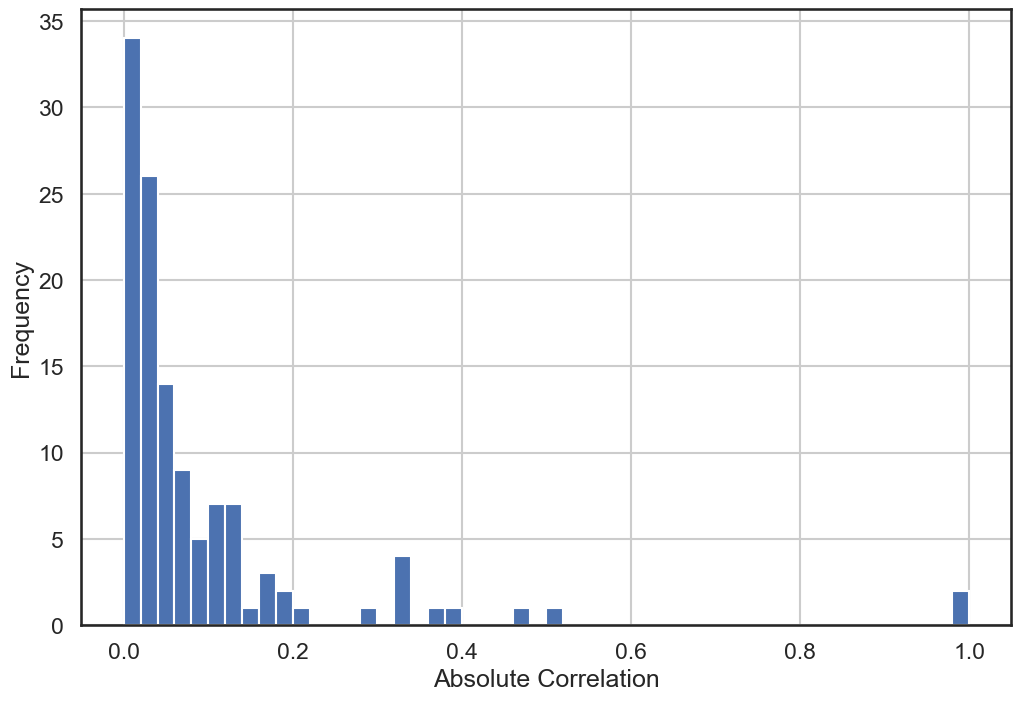

In [792]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [793]:
# from pandas.plotting import scatter_matrix

# scatter_matrix(df2, figsize=(30, 20))

Zobaczmy które zmienne miały korelacje powyżej 0.2


In [794]:
# The most highly correlated values
#Query the columns of a DataFrame with a boolean expression
#query sluzy do filtrowania
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.2')

,feature1,feature2,correlation,abs_correlation
90,arrival_month,month,1.000000,1.000000
81,arrival_year,year,1.000000,1.000000
93,repeated_guest,no_of_previous_bookings_not_canceled,0.516657,0.516657
99,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,0.478953,0.478953
92,repeated_guest,no_of_previous_cancellations,0.389826,0.389826
24,no_of_children,avg_price_per_room,0.363571,0.363571
10,no_of_adults,avg_price_per_room,0.285331,0.285331
110,avg_price_per_room,no_of_special_requests,0.208549,0.208549
89,arrival_month,year,-0.335050,0.335050
75,arrival_year,arrival_month,-0.335050,0.335050


## Obserwacje odstające


In [795]:
df.shape

(35730, 31)

In [796]:
# for col in df.columns:
#     mean = df[col].mean()
#     sd = df[col].std()
#     data = df[(df[col] <= mean+(2*sd))]
    #usuwa wszystkie wartości większe lub równe średnia +2 razy odchylenie standardowe

In [797]:
# df.shape

In [798]:
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers
#usuwa wszystkie obserwacje odstające w 'rozumieniu boxplota'

In [799]:
# outliers_in_columns = df.apply(identify_outliers) # Zidentyfikowanie outliers w każdej kolumnie

# outliers_count_per_column = outliers_in_columns.sum()
# print(outliers_count_per_column)

# df = df[~outliers_in_columns]  # Usunięcie outliers z ramki danych
# df.head()

# number of weekend nights sie przyjrzzec

In [800]:
df.shape

(35730, 31)

In [801]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [802]:
#train_test_split jest najprostrzym podziałem, StratifiedShuffleSplit dba o to aby było równy stosunek w zbiorze testowym i uczącym tego co przewidujemy

In [803]:
df['booking_status']

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 35730, dtype: int32

# Predykcja

In [804]:
# StratifiedShuffleSplit bardziej skomplikowany podział dzieli na zbiory treningowy
#i testowy, przy jednoczesnym zachowaniu proporcji klas (etykiet) w obu tych zbiorach.

# I sposob
from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(housing, housing["income_cat"]):
# strat_train_set = housing.loc[train_index]
# strat_test_set = housing.loc[test_index]
# from sklearn.model_selection import StratifiedShuffleSplit




# II sposob
predictors = [col for col in list(df) if col != 'booking_status']

#feature cols
X = df[predictors]

#Y
Y = df['booking_status']
# Get the split indexes
#n splits - na ile zbiorow uczacych i testowych dzielimy
# test_size dzieli 0.7 to zbiór treningowy a testowy to 0.3
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.2, 
                                          random_state=7)

train_idx, test_idx = next(strat_shuf_split.split(X, Y))

# Create the dataframes
x_train = df.loc[train_idx, predictors]
y_train = df.loc[train_idx, 'booking_status']

x_test  = df.loc[test_idx, predictors]
y_test  = df.loc[test_idx, 'booking_status']

KeyError: '[11005, 25787, 26868, 10285, 17639, 7931, 22937, 23073, 18788, 26947, 10035, 7526, 25973, 34905, 24230, 10837, 1401, 8885, 9849, 9655, 26560, 22216, 10218, 28183, 34258, 3749, 18459, 16284, 10915, 31658, 26864, 23381, 1928, 25433, 24653, 30595, 28318, 10766, 34628, 17998, 9865, 7021, 267, 24968, 21222, 2206, 16375, 19464, 19581, 8165, 33974, 288, 27996, 24472, 28252, 32799, 9684, 6677, 8044, 23697, 19184, 20266, 23313, 21014, 15081, 16276, 3759, 21376, 26167, 28336, 1065, 15185, 17666, 19566, 23708, 13816, 13282, 13437, 20173, 7162, 16030, 3570, 20764, 415, 33579, 26837, 18705, 34080, 9916, 28533, 1403, 6615, 22981, 32689, 7189, 25089, 20672, 32818, 12584, 21585, 24162, 15006, 22606, 7723, 16567, 35347, 27639, 4969, 21550, 16642, 12336, 12934, 145, 19142, 20609, 29765, 23593, 2780, 779, 21233, 12825, 35294, 14464, 13189, 21614, 20439, 11930, 7647, 20939, 988, 24065, 18061, 13277, 10979, 29454, 33186, 28062, 25148, 22230, 209, 30744, 32004, 5464, 3155, 30091, 12228, 18854, 8055, 3023, 23366, 30414, 11714, 24347, 9847, 16343, 4054, 13430, 833, 23084, 24253, 29702, 28161, 26713, 7620, 9795, 19885, 24933, 22501, 7860, 2542, 19792, 266, 32474, 14376, 12597, 34569, 25254, 27665, 32276, 28611, 33087, 18965, 34539, 9286, 14264, 34768, 1986, 22934, 12699, 9704, 14616, 5051, 21298, 7707, 20633, 16697, 32253, 1593, 11883, 1694, 5494, 14914, 13469, 19999, 4157, 18043, 31318, 18759, 31341, 29732, 27558, 24885, 20701, 9663, 25516, 2088, 23915, 8217, 14422, 29492, 17382, 15191, 4130, 11746, 33349, 20142, 21069, 26547, 10542, 21324, 21440, 12705, 1176, 18520, 22080, 2933, 20880, 15177, 2873, 10122, 22926, 2472, 1005, 28108, 23291, 19129, 31299, 28590, 553, 26311, 11039, 7531, 34750, 28128, 12873, 33537, 32633, 7071, 24300, 9430, 26384, 9037, 12448, 25242, 28141, 25953, 12002, 31563, 23711, 7122, 21822, 24146, 4427, 22322, 24306, 7039, 33458, 35408, 13086, 4509, 28082, 14956, 31478, 28587, 22952, 20834, 15129, 5997, 1575, 9736, 3462, 35469, 33147, 24450, 5241, 31356, 35027, 16064, 26304, 4691, 27927, 27179, 26962, 31015, 9726, 897, 6154, 4331, 30127, 20357, 1708, 24576, 7465, 21052, 9204, 14131, 29980, 32363, 14820, 32945, 33966, 33393, 26931, 9768, 29059, 9532, 21789, 9910, 21568, 26240, 18784, 8331, 35006, 2027, 24902, 26320, 25861, 26290, 19087, 17177, 32380, 15165, 22108, 14182, 34435, 3672, 25078, 63, 22289, 618, 28744, 24866, 7670, 1746, 25846, 23117, 18947, 21456, 24658, 24294, 30356, 26803, 7541, 23077, 29375, 25906, 30326, 16972, 8101, 32491, 18204, 3050, 25918, 8955, 21541, 14491, 27063, 24948, 9403, 17005, 10143, 33218, 8847, 32626, 10276, 16525, 28258, 12627, 4610, 13876, 4832, 34626, 1107, 1158, 12423, 23007, 34991, 6389, 32761, 32301, 31934, 28895, 34671, 19990, 24307, 431, 34722, 13297, 31184, 24190, 2749, 2699, 14198, 30627, 15643, 10578, 4292, 26982, 29188, 8997, 24570, 20734, 15587, 27369, 1046, 29152] not in index'

In [814]:
from sklearn.model_selection import StratifiedShuffleSplit

# Przykładowe dane
# Tutaj załóżmy, że 'df' to Twój DataFrame

# Zdefiniowanie predyktorów i zmiennej celu
predictors = [col for col in df.columns if col != 'booking_status']
X = df[predictors]
Y = df['booking_status']

# Utworzenie obiektu StratifiedShuffleSplit
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)

# Pobranie indeksów do podziału
train_idx, test_idx = next(strat_shuf_split.split(X, Y))

# Sprawdzenie czy indeksy są obecne w DataFrame
print("Czy indeksy 'train_idx' są obecne w DataFrame? ", set(train_idx).issubset(df.index))
print("Czy indeksy 'test_idx' są obecne w DataFrame? ", set(test_idx).issubset(df.index))

Czy indeksy 'train_idx' są obecne w DataFrame?  False
Czy indeksy 'test_idx' są obecne w DataFrame?  False


In [805]:
x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
16858,2,0,2,4,0,3,2017,9,19,0,...,0,1,0,0,0,0,0,0,0,1
30032,2,2,0,3,1,206,2018,8,2,0,...,0,0,0,1,0,0,0,0,0,1
1798,2,0,1,3,0,64,2018,7,25,0,...,0,0,0,0,0,0,0,0,0,1
1332,2,0,0,4,0,30,2018,7,26,0,...,0,0,0,0,0,0,0,0,0,1
5548,1,0,0,1,0,21,2018,9,28,0,...,0,0,0,0,0,0,0,0,0,1


In [806]:
y_train.value_counts(normalize=True)
#normalize daje nam proporcje zamiast liczb - latwiej odczytac

1    0.673294
0    0.326706
Name: booking_status, dtype: float64

In [807]:
x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
16858,2,0,2,4,0,3,2017,9,19,0,...,0,1,0,0,0,0,0,0,0,1
30032,2,2,0,3,1,206,2018,8,2,0,...,0,0,0,1,0,0,0,0,0,1
1798,2,0,1,3,0,64,2018,7,25,0,...,0,0,0,0,0,0,0,0,0,1
1332,2,0,0,4,0,30,2018,7,26,0,...,0,0,0,0,0,0,0,0,0,1
5548,1,0,0,1,0,21,2018,9,28,0,...,0,0,0,0,0,0,0,0,0,1


In [808]:
# II sposob za pomoca prostrzej funkcji do podziału na zbiór uczący i testowy

In [809]:
from sklearn.model_selection import train_test_split

predictors = [col for col in list(df) if col != 'booking_status']
#predictors = list(data.columns[:15])
X = df[predictors]
Y = df['booking_status']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
#dzieli 0.8 to zbiór treningowy a testowy to 0.2

In [810]:
counts_train = np.bincount(y_train)
print("Liczba 0 w y_train:", counts_train[0])
print("Liczba 1 w y_train:", counts_train[1])

counts_test = np.bincount(y_test)
print("Liczba 0 w y_test:", counts_test[0])
print("Liczba 1 w y_test:", counts_test[1])

Liczba 0 w y_train: 9487
Liczba 1 w y_train: 19097
Liczba 0 w y_test: 2392
Liczba 1 w y_test: 4754


jest około 2 razy więcej nieodwołanych w zbiorze uczącym i testowym tak samo jak w oryginalnym zbiorze.

In [811]:
# Regresja logistyczna nie akceptuje pustych wartosci

In [812]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
type_of_meal_plan_Meal Plan 1           0
type_of_meal_plan_Meal Plan 2           0
type_of_meal_plan_Meal Plan 3           0
type_of_meal_plan_Not Selected          0
room_type_reserved_Room_Type 1          0
room_type_reserved_Room_Type 2          0
room_type_reserved_Room_Type 3          0
room_type_reserved_Room_Type 4          0
room_type_reserved_Room_Type 5    

In [813]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=10000)

%time model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(accuracy))

CPU times: total: 6.95 s
Wall time: 2.94 s
Accuracy: 0.7963895885810244


 po zastosowaniu StratifiedShuffleSplit Regresja logistyczna ma lepsze accuracy

jakie metryki zastosowac do zmierzenia poprawnosci modleu jesli jest stosunek w y 1:2 kontynuowac lab2

In [ ]:
#Regresja logistyczna accuracy 0.8038594
#po zastosowaniu one hot encoding
# ze zwykłym enkodowaniem 0.78

In [ ]:
# cm: Macierz pomyłek wygenerowana wcześniej.
# annot=True: Określa, czy wartości macierzy mają być wyświetlane na heatmapie. Jeśli True, to wartości zostaną wyświetlone na heatmapie.
# fmt='d': Określa format wartości na heatmapie. W tym przypadku 'd' oznacza format liczb całkowitych.
# cmap='Blues': Określa paletę kolorów używaną w heatmapie. W tym przypadku używana jest paleta "Blues".

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

In [ ]:
confusion = confusion_matrix(y_test, y_pred)

# Stwórz heatmapę
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

Do testów tych należą testy nieparametryczne takie jak test niezależności chi-kwadrat
Pearsona, jak i testy parametryczne, takie jak test z i test t dla dwóch średnich. Druga grupa to opisowe metody
analizy korelacji, polegające na znajdowaniu zależności pomiędzy zmiennymi bez podziału na zmienną zależną
i zmienne niezależne. W metodach tych wykorzystuje się współczynniki przeznaczone zarówno dla zmiennych
mierzonych na skali nominalnej, jak i porządkowej, takie jak współczynniki korelacji liniowej Pearsona, rang
Spearmana i tau Kendalla.

In [ ]:
#plotly express zobaczyc biblioteke

# K Nearest Neighbours (K najbliższych sąsiadów)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# Przygotuj dane do skalowania
scaler = MinMaxScaler()

# Dopasuj scaler do danych treningowych i przekształć je
x_train_scaled = scaler.fit_transform(x_train)

# Dopasuj scaler do danych testowych i przekształć je
x_test_scaled = scaler.transform(x_test)

# Funkcja do oceny modelu dla różnych wartości k
def evaluate_model(k):
    # Tworzenie i dopasowanie modelu kNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)

    # Przewidywanie na danych testowych
    y_pred = knn.predict(x_test_scaled)

    # Tworzenie confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Wizualizacja confusion matrix jako heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for k={k}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Obliczanie metryk
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'For k={k}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('\n')

# Ewaluacja dla k=3
evaluate_model(3)

# Ewaluacja dla k=5
evaluate_model(5)
